# bank_churn

# problem Statement

Classify if a customer is going to churn or not
Preferably and based on model performance, choose a model that will attach 
a probability to the churn to make it easierfor customer service to target low hanging fruits 
their efforts to prevent churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
plt.style.use('ggplot')

In [3]:
bank_c=pd.read_csv(r"C:\Users\SOMNATH BHAGAT\Downloads\projects for resume1\Churn_Modelling.csv")
bank_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank_c.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
bank_c.select_dtypes('object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [13]:
bank_c.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
bank_c.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


 The data appears to be a snapshot as some point in time e.g.
the balance is for a given date which leaves a lot of questions:
What date is it and of what relevance is this date
Would it be possible to obtain balances over a period of time as opposed to a single date.
There are customers who have exited but still have a balance in their account! What would this mean? 
Could they have exited from a product and not the bank?
What does being an active member mean and are there difference degrees to it? Could it be better 
to provide transaction count both in terms of credits and debits to the account instead?
A break down to the products bought into by
a customer could provide more information topping listing of product count

<AxesSubplot:xlabel='Exited', ylabel='count'>

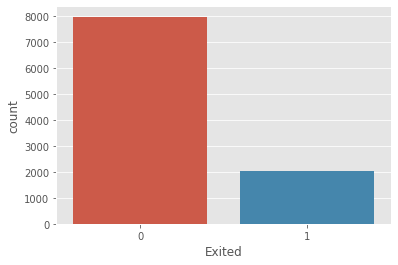

In [7]:
sns.countplot(x='Exited',data=bank_c)

In [44]:
bank_c.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Text(0.5, 1.0, 'Proportion of customer churned and retained')

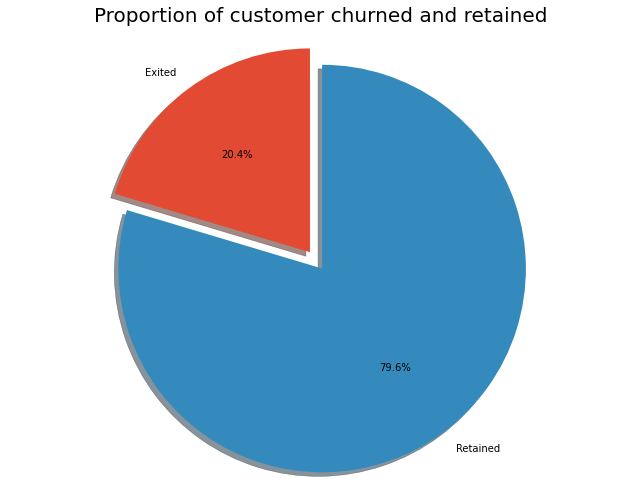

In [80]:
labels = 'Exited', 'Retained'
sizes = [bank_c.Exited[bank_c['Exited']==1].count(), bank_c.Exited[bank_c['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)


Text(0.5, 1.0, 'Proportion of customer churned and retained')

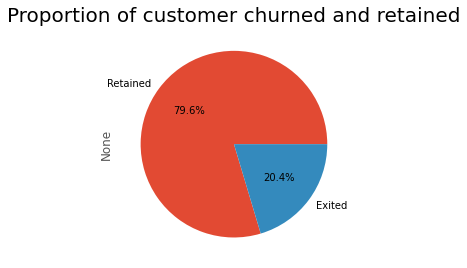

In [81]:
bank_c[['Exited']].value_counts().plot(kind='pie',autopct='%1.1f%%',labels =['Retained','Exited'])
plt.title("Proportion of customer churned and retained", size = 20)    

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn.
Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% 
as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that 
are retained.

In [22]:
bank_c.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 1440x576 with 0 Axes>

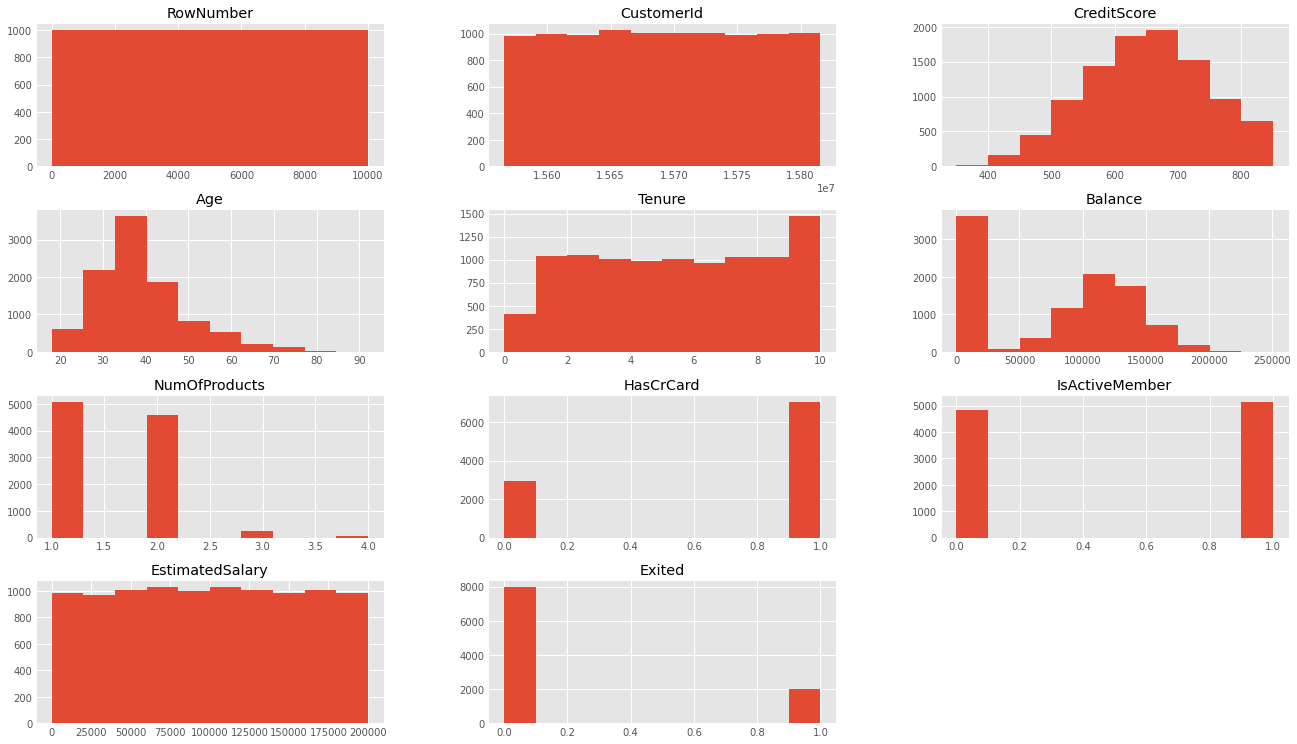

In [82]:
plt.figure(figsize=(20,8))
bank_c.hist(figsize=(20,12))

In [ ]:
bank_c['Exited'].plot(kind='')

In [68]:
pd.crosstab(bank_c['Geography'],bank_c['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<AxesSubplot:xlabel='Geography'>

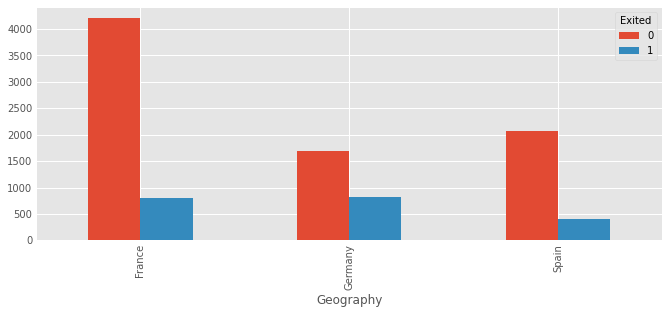

In [87]:
pd.crosstab(bank_c['Geography'],bank_c['Exited']).plot(kind='bar',figsize=(10,4))

In [18]:
bank_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
money_loose=pd.pivot_table(bank_c,'Balance',columns='Exited',aggfunc=sum)

In [17]:
np.ceil(money_loose).T

,Balance
Exited,
0,579270799.0
1,185588095.0


In [20]:
pd.crosstab(bank_c['Gender'],bank_c['Exited'])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


<AxesSubplot:xlabel='Gender', ylabel='count'>

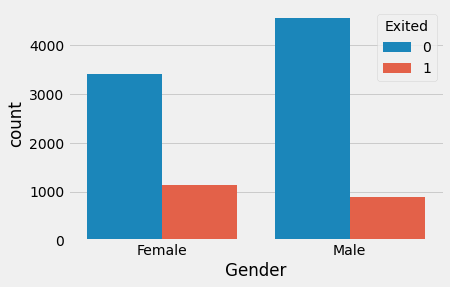

In [19]:
sns.countplot(x='Gender',hue='Exited',data=bank_c)

In [25]:
bank_c.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Surname'>

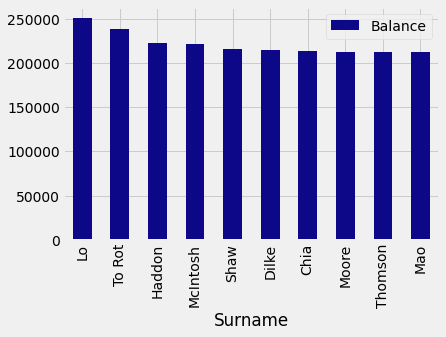

In [45]:
bank_c[['Surname','Balance']].sort_values(by='Balance',ascending=False).head(10).plot(kind='bar',x='Surname',cmap='plasma')

In [46]:
bank_c[['Surname','Balance']].sort_values(by='Balance',ascending=False).head(10)

,Surname,Balance
2092,Lo,250898.09
3280,To Rot,238387.56
8733,Haddon,222267.63
3588,McIntosh,221532.80
6717,Shaw,216109.88
1067,Dilke,214346.96
138,Chia,213146.20
1533,Moore,212778.20
3920,Thomson,212696.32
2709,Mao,212692.97


<AxesSubplot:xlabel='Tenure'>

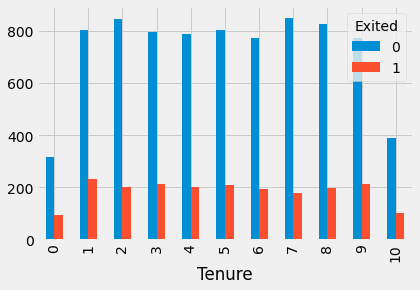

In [51]:
pd.crosstab(bank_c['Tenure'],bank_c['Exited']).plot(kind='bar')

<AxesSubplot:xlabel='CreditScore'>

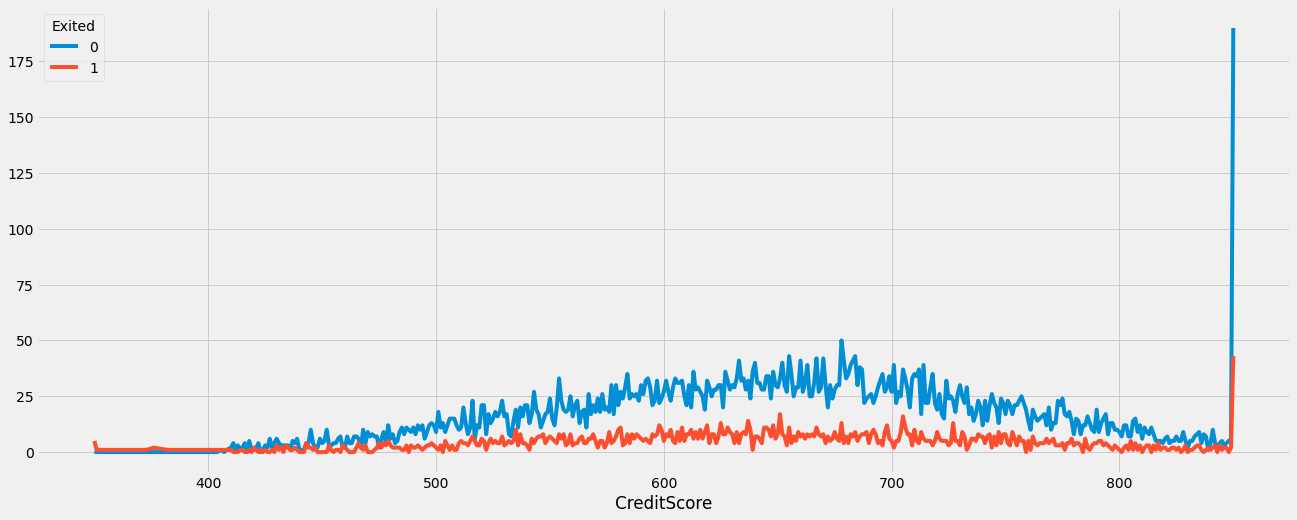

In [71]:
pd.crosstab(bank_c['CreditScore'],bank_c['Exited']).plot(kind='line',figsize=(20,8))

In [95]:
pd.crosstab(bank_c['CreditScore'],bank_c['Exited']).sort_values(by='CreditScore',ascending=False).head(20)

Exited,0,1
CreditScore,,
850,190,43
849,6,2
848,5,0
847,4,2
846,3,2
845,5,1
844,4,3
843,2,0
842,4,3


In [76]:
bank_c.loc[bank_c['Exited']==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


<AxesSubplot:xlabel='Age', ylabel='count'>

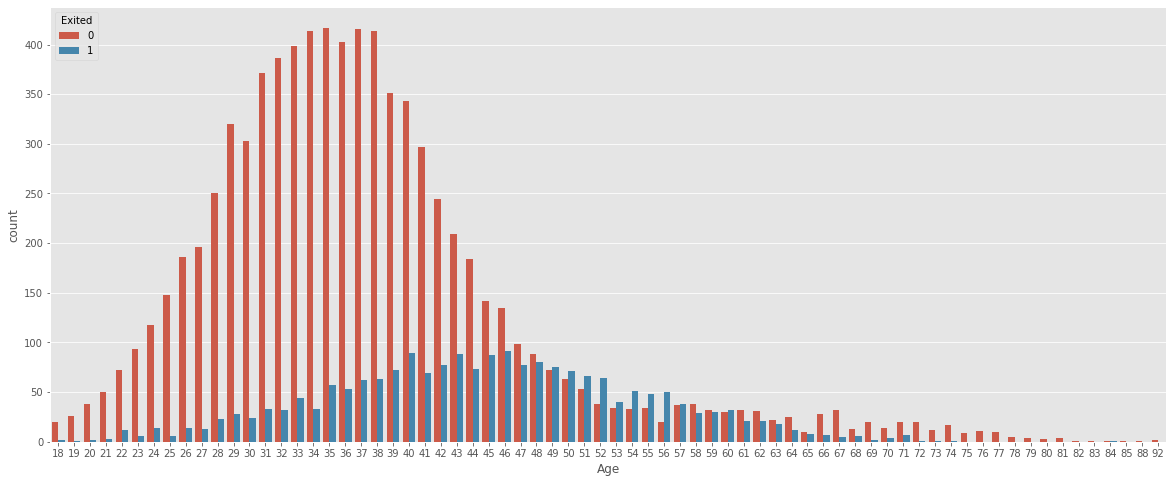

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(x='Age',hue='Exited',data=bank_c)
# plt.yscale('log')

C:\Users\SOMNATH BHAGAT\anaconda3\envs\bank_churn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exited', ylabel='Density'>

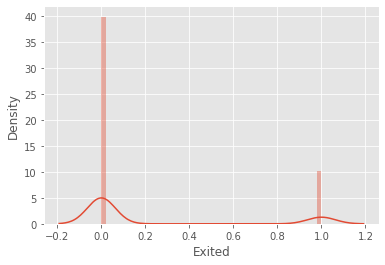

In [20]:
sns.distplot(bank_c['Exited'])

# Feature_Selection

In [21]:
bank_c.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
bank_c.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<AxesSubplot:>

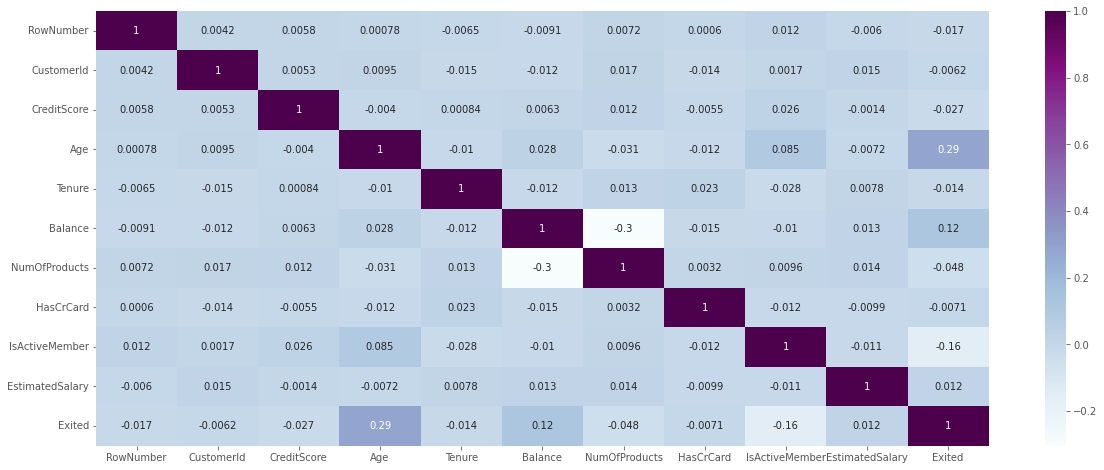

In [36]:
plt.figure(figsize=(20,8))
crr=bank_c.corr()
sns.heatmap(crr,annot=True,cmap='BuPu')

<AxesSubplot:>

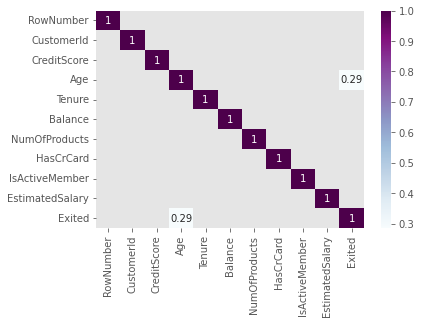

In [37]:
sns.heatmap(crr[crr>.2],annot=True,cmap='BuPu')

In [4]:
bank_c.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
bank_c=bank_c.drop(labels=['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [5]:
del bank_c['Gender']

In [17]:
bank_c

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0
9996,516,France,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1


In [18]:
geo=pd.get_dummies(bank_c['Geography'])
geo

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [19]:
churn=pd.concat([bank_c,geo],axis=1)

In [20]:
del churn['Geography']

In [21]:
churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0


[0.14304612 0.24080941 0.10378133 0.13749465 0.14445669 0.01896187
 0.03713176 0.1406979  0.00873921 0.01931742 0.00556365]


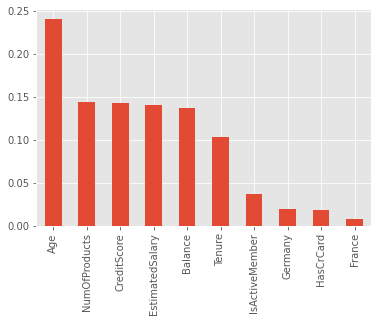

In [22]:
x=churn.drop('Exited',axis=1)
y=churn['Exited']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=.2,random_state=1)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf=RandomForestClassifier()

In [25]:
model=rf.fit(x,y)

In [26]:
y_pred=rf.predict(x_test)
prediction=accuracy_score(y_test,y_pred)
print(prediction)

1.0


In [27]:
report=confusion_matrix(y_test,y_pred)
print(report)

[[1585    0]
 [   0  415]]


In [118]:
report2=classification_report(y_test,y_pred)
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1585
           1       1.00      1.00      1.00       415

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# HyperParameter_tuning

In [28]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6,
                            max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0,
                            n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)

In [29]:
model=rf.fit(x,y)
y_pred=rf.predict(x_test)
prediction=accuracy_score(y_test,y_pred)
print(prediction)
report=confusion_matrix(y_test,y_pred)
print(report)
report2=classification_report(y_test,y_pred)
print(report2)

0.887
[[1558   27]
 [ 199  216]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1585
           1       0.89      0.52      0.66       415

    accuracy                           0.89      2000
   macro avg       0.89      0.75      0.79      2000
weighted avg       0.89      0.89      0.88      2000



In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob =rf.predict_proba(x_test)
y_pred_prob
fpr , tpr, thresh = roc_curve(y_test,y_pred_prob[:,1])

Text(0, 0.5, 'True Positive Rate')

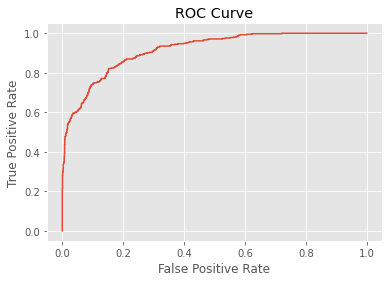

In [31]:
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [32]:
import pickle

In [33]:
with open('bankchurn_pkl', 'wb') as files:
    pickle.dump(rf, files)